In [35]:
with open("input.txt", "r") as file:
    data = file.read()
    data = data.splitlines()


## Part 1

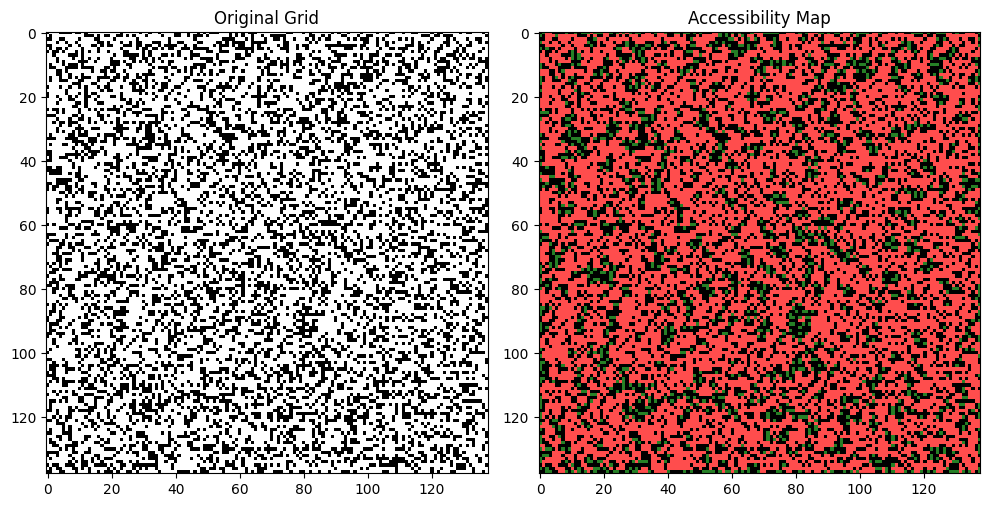

Number of accessible rolls: 1376


In [36]:
import numpy as np
import matplotlib.pyplot as plt
def make_grid(data: list[str]) -> np.ndarray:
    map = {"@": 1, ".": 0}
    grid = np.array([[map[char] for char in line] for line in data])

    return grid

example_data = ["..@@.@@@@.",
"@@@.@.@.@@",
"@@@@@.@.@@",
"@.@@@@..@.",
"@@.@@@@.@@",
".@@@@@@@.@",
".@.@.@.@@@",
"@.@@@.@@@@",
".@@@@@@@@.",
"@.@.@@@.@."]

grid = make_grid(data)


def count_accessible_rolls(grid: np.ndarray, plot=True) -> int:
    """ A roll is accessible if less than 4 of its 8 neighbors are rolls (1) """

    padded_grid = np.pad(grid, pad_width=1, mode='constant', constant_values=0)
    map_of_accessibility = padded_grid.copy()
    rows, cols = map_of_accessibility.shape

    for r in range(1, rows-1):
        for c in range(1, cols-1):
            if padded_grid[r, c] == 1:  # Only consider rolls
                neighbors = padded_grid[r-1:r+2, c-1:c+2]
                roll_count = np.sum(neighbors) - 1  # Exclude center
                if roll_count < 4:
                    map_of_accessibility[r, c] = 1  # Mark as accessible
                else:
                    map_of_accessibility[r, c] = 2  # Mark as inaccessible
            else:
                map_of_accessibility[r, c] = 0  # Empty space

    accessible_count = np.sum(map_of_accessibility == 1)
    map_of_accessibility = map_of_accessibility[1:-1, 1:-1]
    if plot:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(grid, cmap="gray")
        ax[0].set_title("Original Grid")
        cmap = plt.matplotlib.colors.ListedColormap(['black', 'green', 'red'])
        ax[1].imshow(map_of_accessibility, cmap="gray")
        ax[1].imshow(map_of_accessibility, cmap=cmap, alpha=0.7)
        ax[1].set_title("Accessibility Map")
        fig.tight_layout()
    plt.show()

    return accessible_count, map_of_accessibility

accessible_count, accessibility_map = count_accessible_rolls(grid)
print(f"Number of accessible rolls: {accessible_count}")





## Part 2

In [37]:
grid = make_grid(data)

In [48]:
def remove_rolls(grid: np.ndarray, plot=False) -> np.ndarray:
    """ Remove accessible rolls and return updated grid"""
    
    removable_roll_count, accessibility_map = count_accessible_rolls(grid, plot=plot)
    remove_map = accessibility_map == 1
    grid[remove_map] = 0 # Remove accessible rolls
    grid[grid == 2] = 1  # Reset inaccessible rolls back to rolls
    return grid, removable_roll_count

total_removed = 0
removable_count = -1
while removable_count != 0:
    grid, removable_count = remove_rolls(grid)
    total_removed += removable_count

print(f"Total rolls removed: {total_removed}")


Total rolls removed: 0


## Animate removal process :D

In [65]:
# visualization of removal process
import matplotlib.animation as animation

grid = make_grid(data)

def visualize_removal_process(grid: np.ndarray):
    """ Animate the removal process of accessible rolls """
    fig, ax = plt.subplots()
    ims = []
    removable_count = -1
    while removable_count != 0:
        im = ax.imshow(grid, cmap="gray", animated=True)
        fig.tight_layout()  
        ims.append([im])
        plt.close()  # Prevents extra static plot display
        grid, removable_count = remove_rolls(grid)
    ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)  
    return ani
animation = visualize_removal_process(grid)
animation.save('removal_process.gif', writer='pillow')



![removal process](removal_process.gif "removal process")